# Shape Edge Detection

ref. https://tatsy.github.io/programming-for-beginners/python/figure-detection/  
ref. https://qiita.com/sitar-harmonics/items/ac584f99043574670cf3

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.show() # call at first for applying rcParams
plt.rcParams['figure.figsize'] = (15, 15)

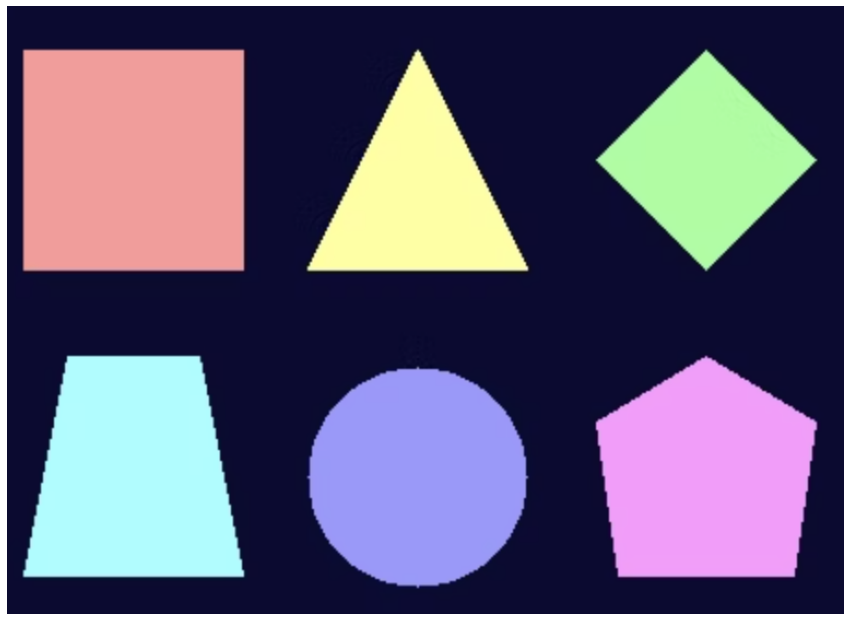

In [3]:
img_file = 'resources/shape_edge_detection/shapes.png'
img = cv2.imread(img_file, cv2.IMREAD_COLOR) 

# PNG is BGR, convert to RGB
_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(_img)
plt.axis('off')
plt.show()

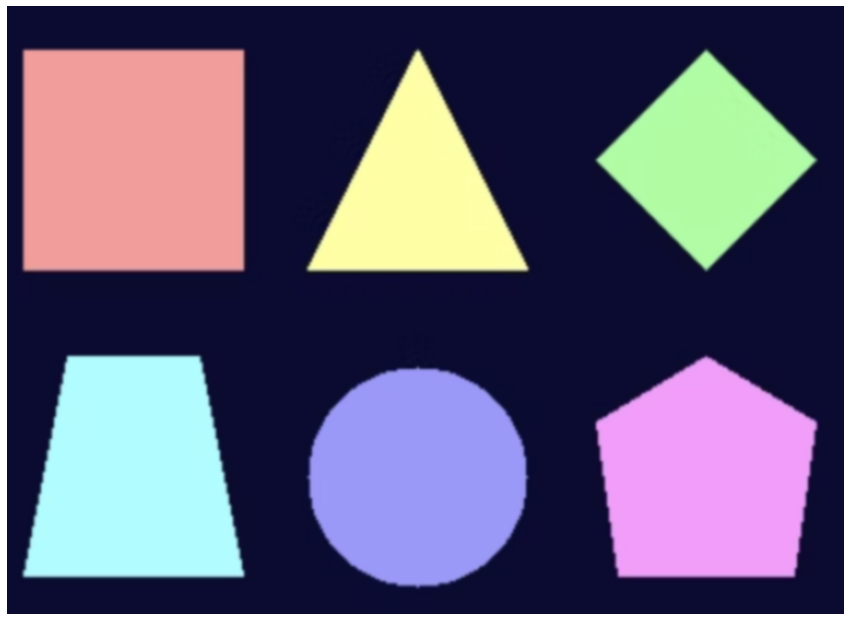

In [4]:
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

_img_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)
plt.imshow(_img_blur)
plt.axis('off')
plt.show()

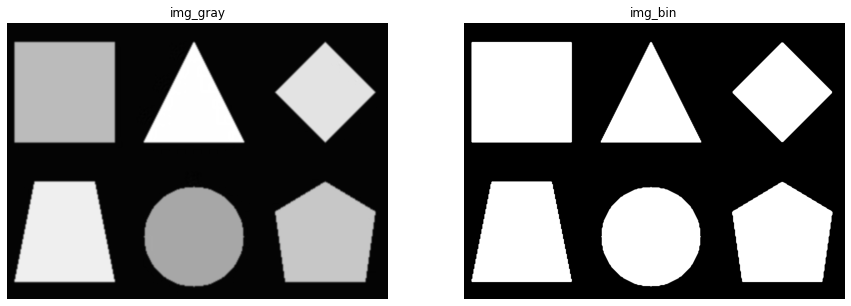

In [5]:
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
# ref. https://imagingsolution.blog.fc2.com/blog-entry-113.html
_, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('img_gray')
ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

ax2.title.set_text('img_bin')
ax2.imshow(img_bin, cmap='gray')
ax2.axis('off')

plt.show()

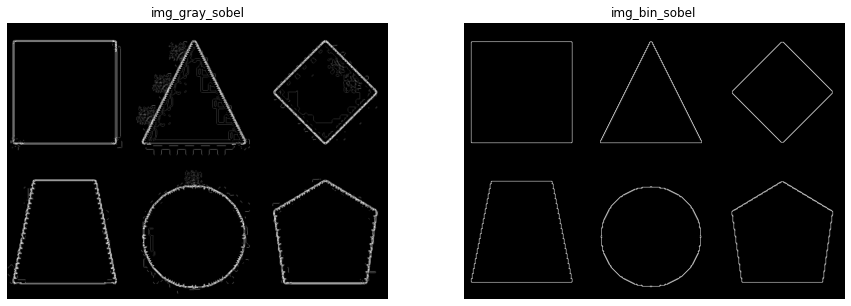

In [6]:
# ref. http://opencv.jp/opencv-2svn/cpp/image_filtering.html?highlight=sobel#cv-sobel
dx = cv2.Sobel(img_gray, cv2.CV_8U, 2, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_8U, 0, 2, ksize=3)
img_gray_sobel = np.sqrt(dx * dx + dy * dy)

dx = cv2.Sobel(img_bin, cv2.CV_8U, 2, 0, ksize=3)
dy = cv2.Sobel(img_bin, cv2.CV_8U, 0, 2, ksize=3)
img_bin_sobel = np.sqrt(dx * dx + dy * dy).astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('img_gray_sobel')
ax1.imshow(img_gray_sobel, cmap='gray')
ax1.axis('off')

ax2.title.set_text('img_bin_sobel')
ax2.imshow(img_bin_sobel, cmap='gray')
ax2.axis('off')

plt.show()

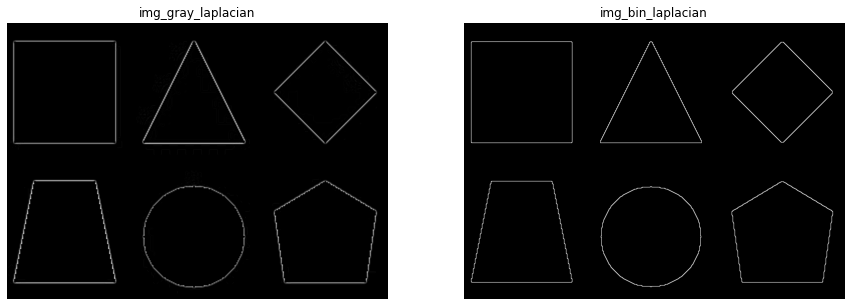

In [7]:
# ref. http://opencv.jp/opencv-2svn/cpp/image_filtering.html?highlight=sobel#cv-laplacian
img_gray_laplacian = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=3)
img_bin_laplacian = cv2.Laplacian(img_bin, cv2.CV_8U, ksize=3)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('img_gray_laplacian')
ax1.imshow(img_gray_laplacian, cmap='gray')
ax1.axis('off')

ax2.title.set_text('img_bin_laplacian')
ax2.imshow(img_bin_laplacian, cmap='gray')
ax2.axis('off')

plt.show()

In [8]:
img_src = img_bin_sobel
contours, _ = cv2.findContours(img_src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('{:d} contours detected!'.format(len(contours)))

6 contours detected!


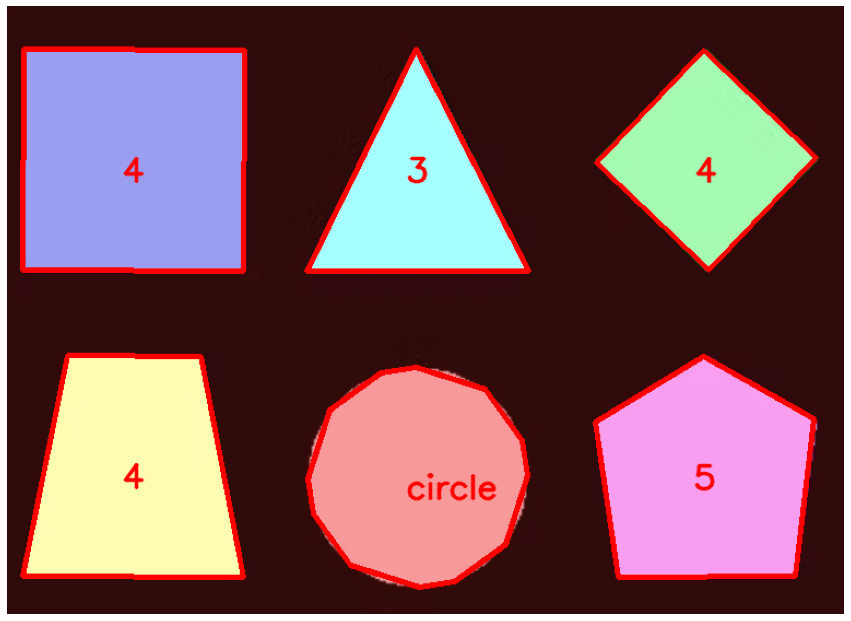

In [9]:
result = img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
color = (255, 0, 0) # RGB

for cnt in contours:
    arclen = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, arclen * 0.01, True)
    cv2.drawContours(result, [approx], -1, color, thickness=3)
    
    text = str(len(approx)) if len(approx) < 10 else 'circle'
    position_min = np.asarray(approx).reshape((-1, 2)).min(axis=0).astype('int32')
    position_max = np.asarray(approx).reshape((-1, 2)).max(axis=0).astype('int32')
    offset = (-20, 10)
    px, py = (position_min + position_max) // 2 + offset

    cv2.putText(result, text, (px + 10, py + 10), font, 1.0, color, 2, cv2.LINE_AA)

plt.imshow(result)
plt.axis('off')
plt.show()